In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CHIS-decade.csv to CHIS-decade.csv
Saving DEVA-decade.csv to DEVA-decade.csv
Saving JOTR-decade.csv to JOTR-decade.csv
Saving KICA-decade.csv to KICA-decade.csv
Saving LAVO-decade.csv to LAVO-decade.csv
Saving PINN-decade.csv to PINN-decade.csv
Saving REDW-decade.csv to REDW-decade.csv
Saving SEQU-decade.csv to SEQU-decade.csv
Saving YOSE-decade.csv to YOSE-decade.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving footfall-stats-california-national-parks.csv to footfall-stats-california-national-parks.csv


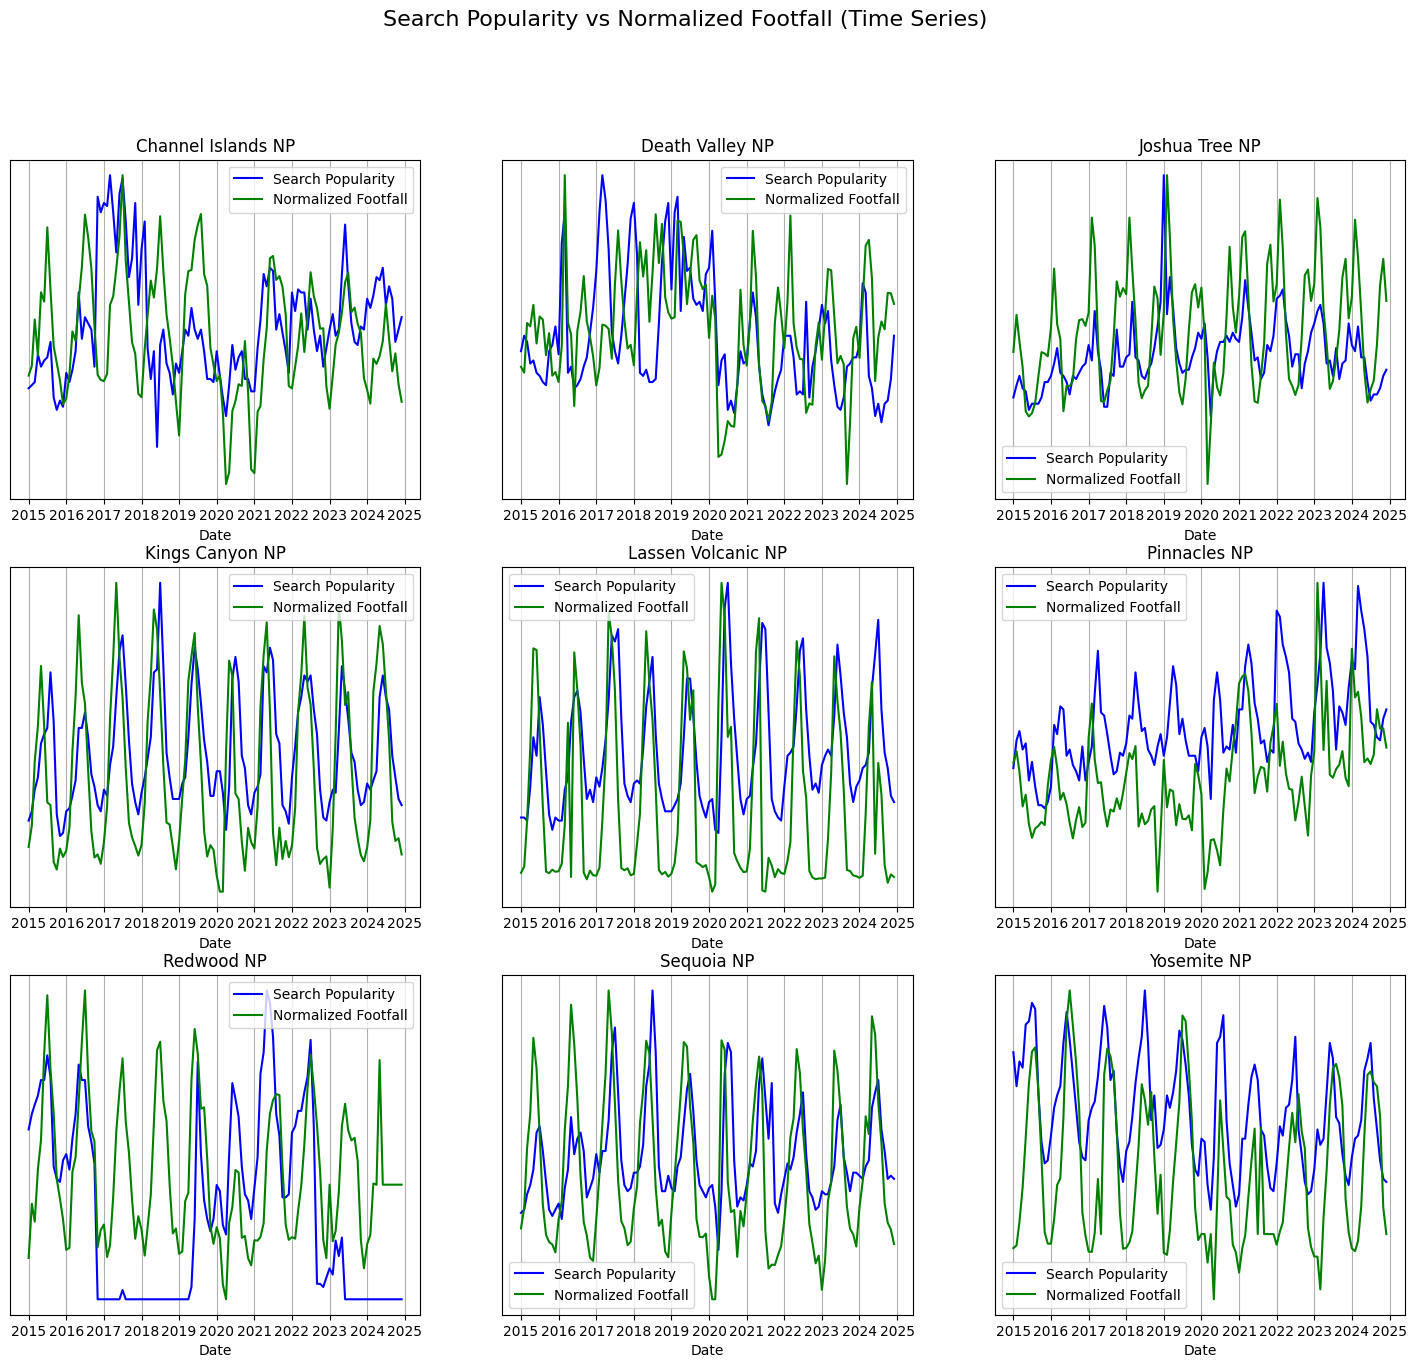

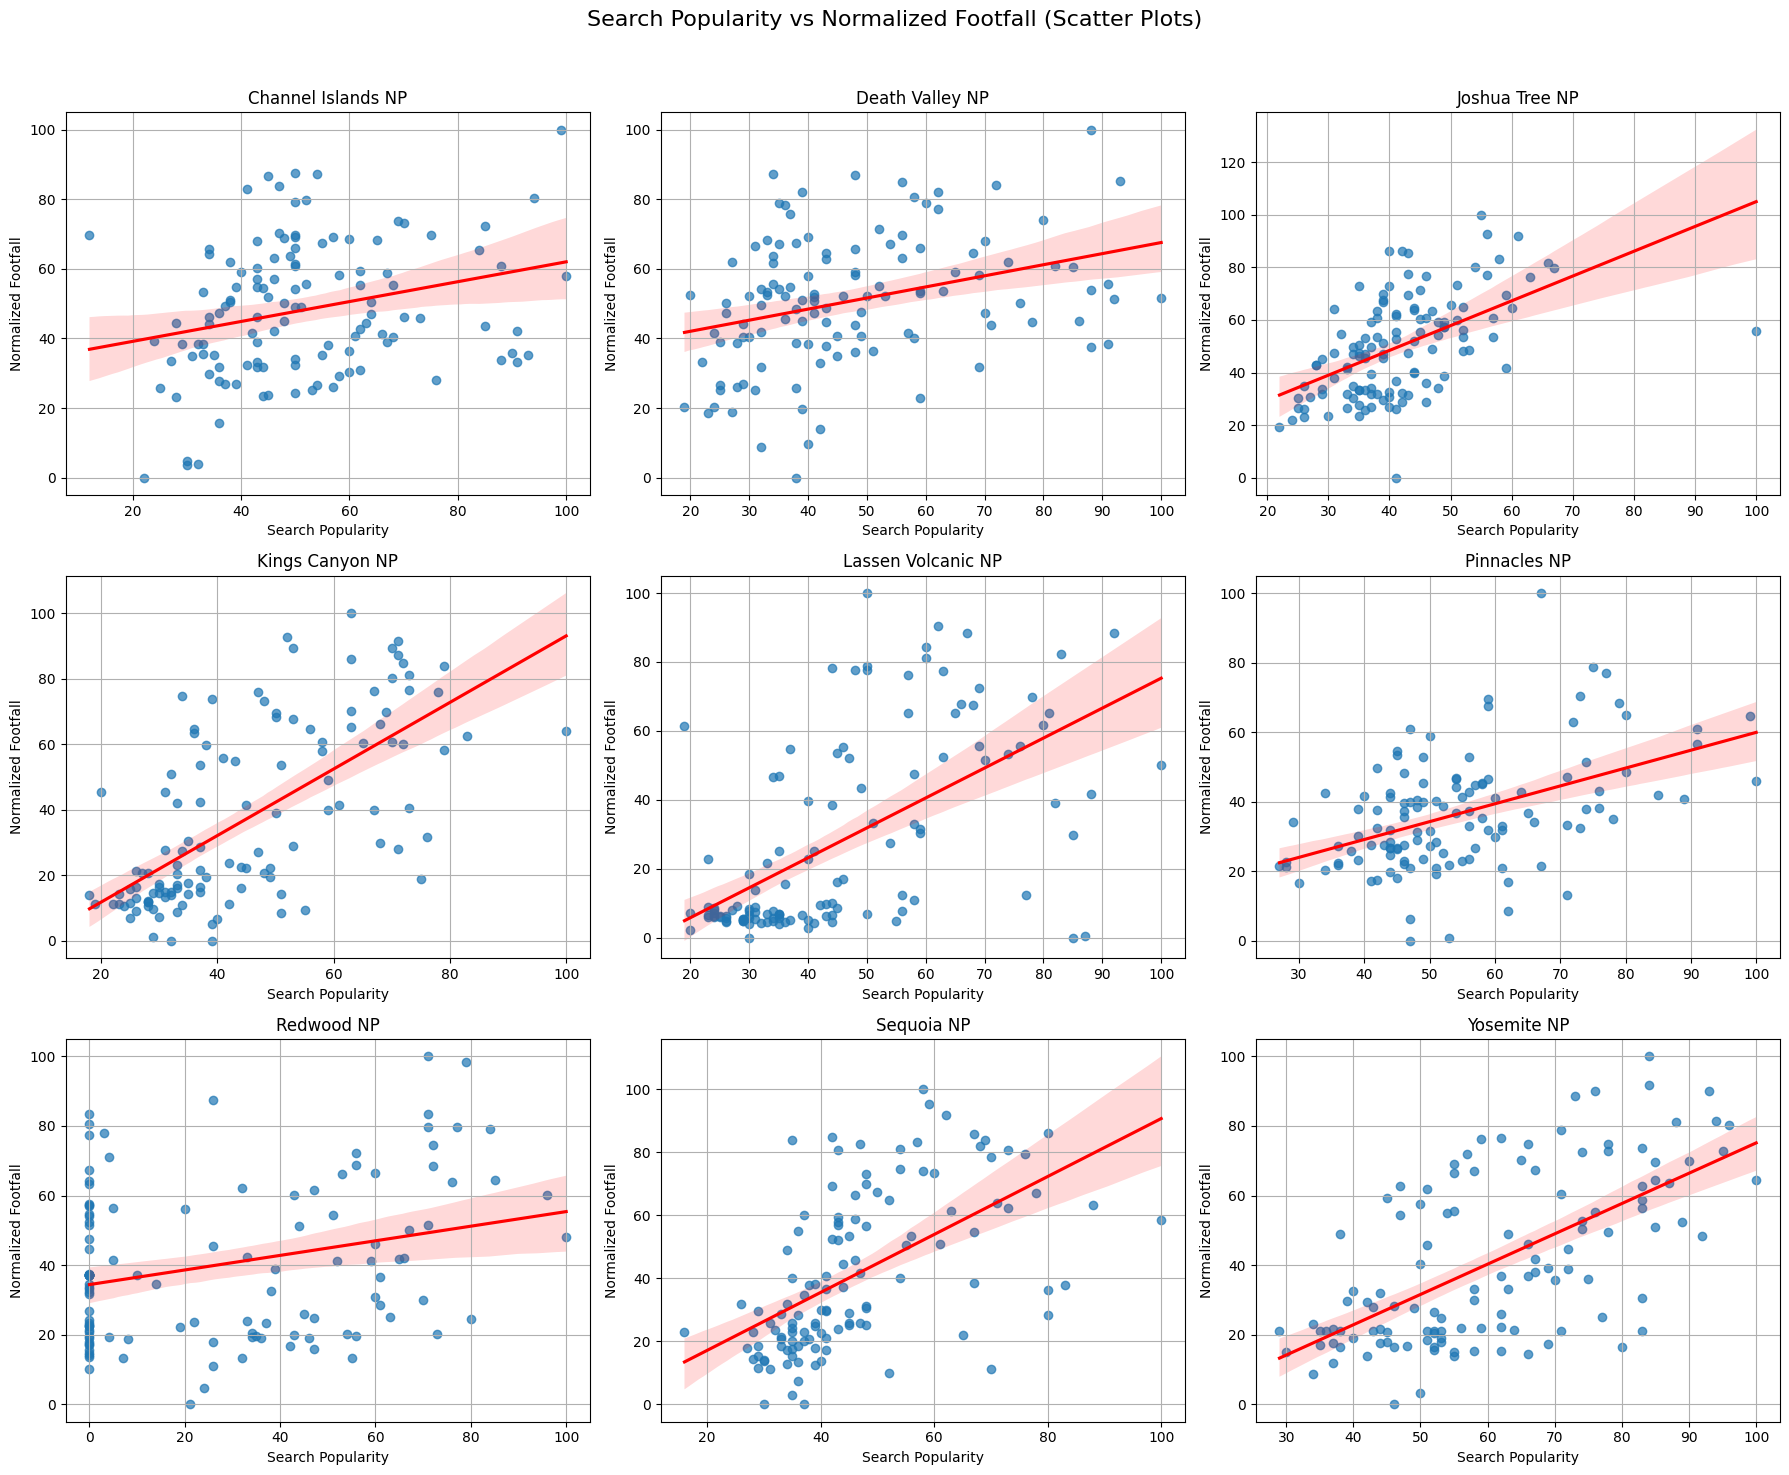

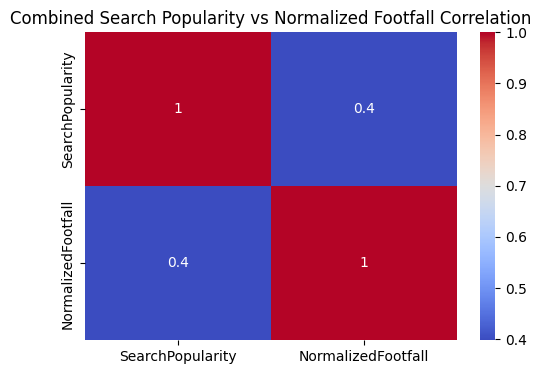

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Paths
footfall_csv = 'footfall-stats-california-national-parks.csv'
park_codes = {
    "Channel Islands NP": "CHIS",
    "Death Valley NP": "DEVA",
    "Joshua Tree NP": "JOTR",
    "Kings Canyon NP": "KICA",
    "Lassen Volcanic NP": "LAVO",
    "Pinnacles NP": "PINN",
    "Redwood NP": "REDW",
    "Sequoia NP": "SEQU",
    "Yosemite NP": "YOSE"
}

footfall_df = pd.read_csv(footfall_csv, header=None, usecols=[0,1,2,3], names=['national park name', 'month', 'year', 'total footfall'])
footfall_df['Date'] = pd.to_datetime(footfall_df['year'].astype(str) + footfall_df['month'], format='%Y%b')

combined_corr_data = pd.DataFrame()

fig_ts, axs_ts = plt.subplots(3, 3, figsize=(18, 15))
fig_scatter, axs_scatter = plt.subplots(3, 3, figsize=(18, 15))

for idx, (park_name, code) in enumerate(park_codes.items()):
    trends_file = f'{code}-decade.csv'
    if not os.path.exists(trends_file):
        print(f"Missing data for {park_name}")
        continue

    # Load trends data, skipping initial non-data rows
    trends_df = pd.read_csv(trends_file, skiprows=2)
    trends_df.columns = ['Date', 'SearchPopularity']
    trends_df['Date'] = pd.to_datetime(trends_df['Date'])

    # Filter footfall data for this park
    park_footfall = footfall_df[footfall_df['national park name'] == park_name]

    # Merge datasets
    merged_df = pd.merge(trends_df, park_footfall, on='Date', how='inner')

    # Normalize footfall values for time-series
    merged_df['NormalizedFootfall'] = (merged_df['total footfall'] - merged_df['total footfall'].min()) / (merged_df['total footfall'].max() - merged_df['total footfall'].min()) * 100

    # Add to combined dataframe for correlation
    combined_corr_data = pd.concat([combined_corr_data, merged_df[['SearchPopularity', 'NormalizedFootfall']]])

    row, col = divmod(idx, 3)

    # Time-Series Plot (normalized)
    axs_ts[row, col].plot(merged_df['Date'], merged_df['SearchPopularity'], label='Search Popularity', color='blue')
    axs_ts[row, col].plot(merged_df['Date'], merged_df['NormalizedFootfall'], label='Normalized Footfall', color='green')
    axs_ts[row, col].set_title(f'{park_name}')
    axs_ts[row, col].set_xlabel('Date')
    axs_ts[row, col].set_yticks([])
    axs_ts[row, col].legend()
    axs_ts[row, col].grid(True)

    # Scatter Plot with Trend Line
    sns.regplot(data=merged_df, x='SearchPopularity', y='NormalizedFootfall', scatter_kws={'alpha':0.7}, line_kws={'color':'red'}, ax=axs_scatter[row, col])
    axs_scatter[row, col].set_title(f'{park_name}')
    axs_scatter[row, col].set_xlabel('Search Popularity')
    axs_scatter[row, col].set_ylabel('Normalized Footfall')
    axs_scatter[row, col].grid(True)

fig_ts.suptitle('Search Popularity vs Normalized Footfall (Time Series)', fontsize=16)
fig_scatter.suptitle('Search Popularity vs Normalized Footfall (Scatter Plots)', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Combined Correlation Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(combined_corr_data.corr(), annot=True, cmap='coolwarm')
plt.title('Combined Search Popularity vs Normalized Footfall Correlation')
plt.show()
